In [71]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

## Train dataset

In [72]:
df=pd.read_csv("C:\\Users\\vikas\\Desktop\\fliprobo\\Malignant-Comments-Classifier-Project\\Malignant Comments Classifier Project\\train.csv") 

In [73]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

No. of Rows : 159571
No. of Columns : 8


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### . This data set consist 159571 rows and 8 columns. In which 'malignant','highly_malignant','rude','threat','abuse' and 'loathe' having binary class of Yes(1) and No(0)

In [74]:
# Sorting out columns for datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], object: ['id', 'comment_text']}

### There are two datatypes, in which variables containing "int" data are 'malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe', 'label', 'length_before_cleaning' and object data is 'comment_text'. 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


## its showing zero null values in train dataset, we will check it later

In [76]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

## Test data set

In [77]:
dft=pd.read_csv("C:\\Users\\vikas\\Desktop\\fliprobo\\Malignant-Comments-Classifier-Project\\Malignant Comments Classifier Project\\test.csv") 

In [78]:
print('No. of Rows :',dft.shape[0])
print('No. of Columns :',dft.shape[1])
pd.set_option('display.max_columns',None)
dft.head()

No. of Rows : 153164
No. of Columns : 2


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


### In this only 2 columns are there and 153164 rows.

In [79]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [80]:
dft.dtypes

id              object
comment_text    object
dtype: object

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
malignant,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


## Checking the Null Values in the above train and test data set.

In [82]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [83]:
dft.isnull().sum()

id              0
comment_text    0
dtype: int64

### We have no given null values in our data set

## Checking total count of unique elements of each columns of train and test dataset

In [84]:
df.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [85]:
dft.nunique()

id              153164
comment_text    153164
dtype: int64

## Checking unique values present in the columns :
"malignant", "highly_malignant", "rude", "threat", "abuse", "loathe"

In [86]:
comment_columns= ["malignant", "highly_malignant", "rude", "threat", "abuse", "loathe"]
for i in df[comment_columns]:
    print(i, df[i].unique(),"\n")

malignant [0 1] 

highly_malignant [0 1] 

rude [0 1] 

threat [0 1] 

abuse [0 1] 

loathe [0 1] 



## Data Cleaning

In [87]:
#dropping column "id" as this column contains unique value which is not relevant for prediction
df.drop("id",axis=1,inplace=True)

In [88]:
#dropping column "id" as this column contains unique value which is not relevant for prediction
dft.drop("id",axis=1,inplace=True)

## Checking the comments text of trsin dataset

In [89]:
## comments
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

## Using NLP, we have to do a lots of text processing to get the words that is going to be important for our model.

# Exploring the target variables

In [91]:
for i in df.columns[1:]:
    print('Value Counts of',i)
    print(df[i].value_counts())
    print('*'*100)

Value Counts of malignant
0    144277
1     15294
Name: malignant, dtype: int64
****************************************************************************************************
Value Counts of highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
****************************************************************************************************
Value Counts of rude
0    151122
1      8449
Name: rude, dtype: int64
****************************************************************************************************
Value Counts of threat
0    159093
1       478
Name: threat, dtype: int64
****************************************************************************************************
Value Counts of abuse
0    151694
1      7877
Name: abuse, dtype: int64
****************************************************************************************************
Value Counts of loathe
0    158166
1      1405
Name: loathe, dtype: int64
*******************************

## From 1st view, we can clearly say that the given dataset is imbalanced dataset and we will look into this later

# EDA

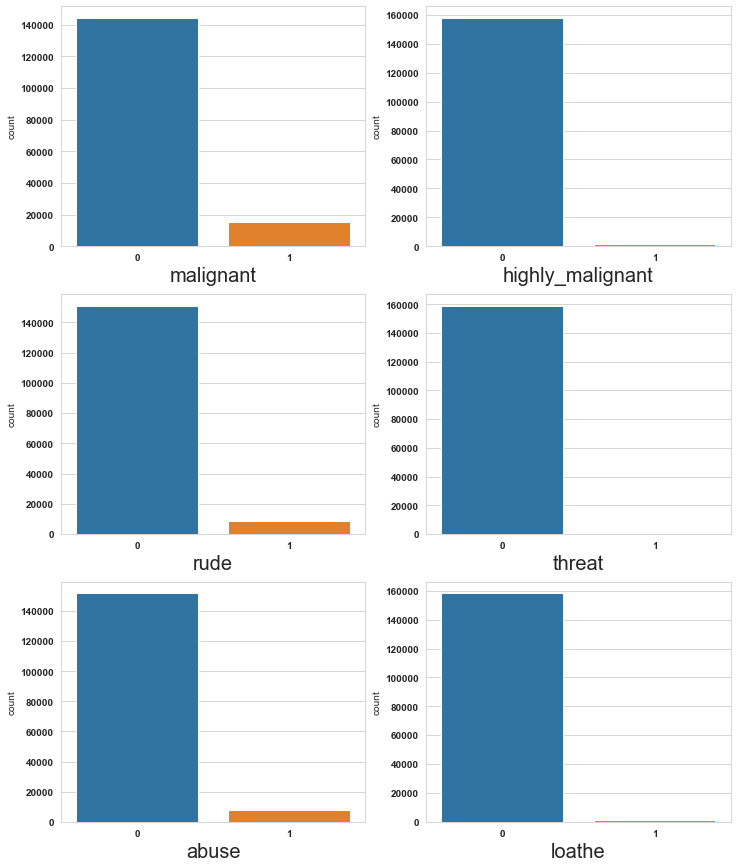

In [92]:
# Plotting countplot for all the features
categories=df.columns[1:]
plt.figure(figsize=(12,15),facecolor='white')
plotnumber=1
for col in categories:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(df[col])
        plt.xlabel(col,fontsize=20)
        plt.xticks(fontsize=10,fontweight ='bold')
        plt.yticks(fontsize=10,fontweight ='bold')
    plotnumber += 1
plt.show()

### As we have already obsereved that the dataset is imbalanced and we can see it here too, while malignant column having maximum negative comments and followed by abuse and rude columns.Threat column has minimum negative comments.

In [93]:
#Checking the percentage of the comments
none = df[(df['malignant']!=1) & (df['highly_malignant']!=1) & (df['rude']!=1) & 
                            (df['threat']!=1) & (df['abuse']!=1) & (df['loathe']!=1)]
percent=len(none)/len(df)*100
print('Percentage of neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


### Around 90% comments are postive or we can say not negative comments in the dataset while 10% having comments that are negative in nature 

In [94]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count = df.iloc[:,1:].sum()

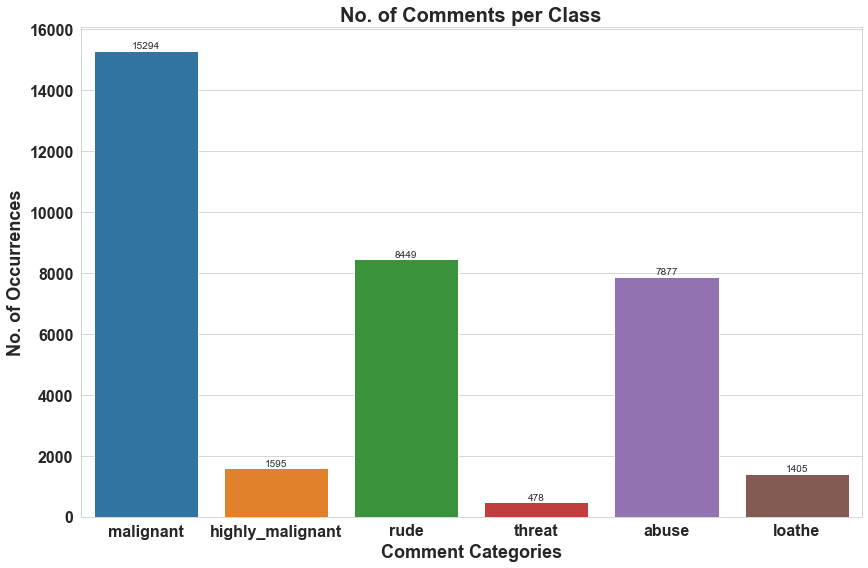

In [95]:
# Plot a chart with the following size
plt.figure(figsize=(14,9))

# Plot a bar chart using the index (category values) and the count of each category.
ax = sns.barplot(data_count.index, data_count.values)

plt.title("No. of Comments per Class", fontsize=20, fontweight='bold')
plt.ylabel('No. of Occurrences', fontsize=18,fontweight='bold')
plt.xlabel('Comment Categories', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

### Out of whole negative comments Malignant comments are maximum followed by Rude and Abuse while minimum comments are from Threat 

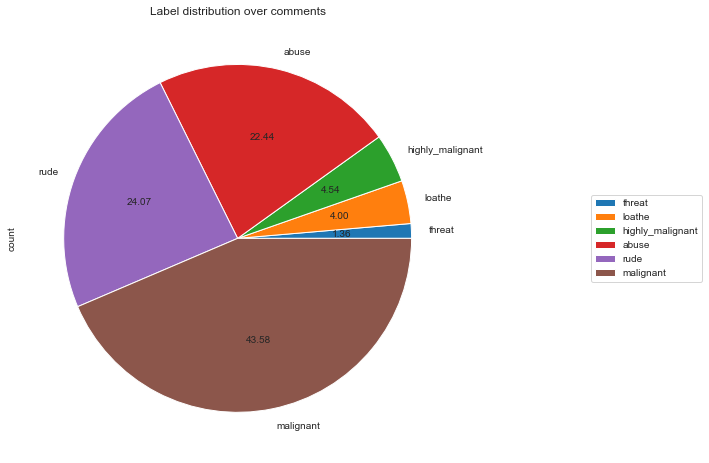

In [96]:
#Visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df[df.columns[1:]].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments',
                         autopct='%2.2f', figsize = (8,8))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

## Observation
1. Around 90% comments are Neutral in nature while rest 10% comments are Negative in nature.
2. Out of total negative comments around 43.58% are malignant in nature followed by 24.07% are rude comments.

In [97]:
comment_len = df.comment_text.str.len()
df.comment_text.str.len().median()

205.0

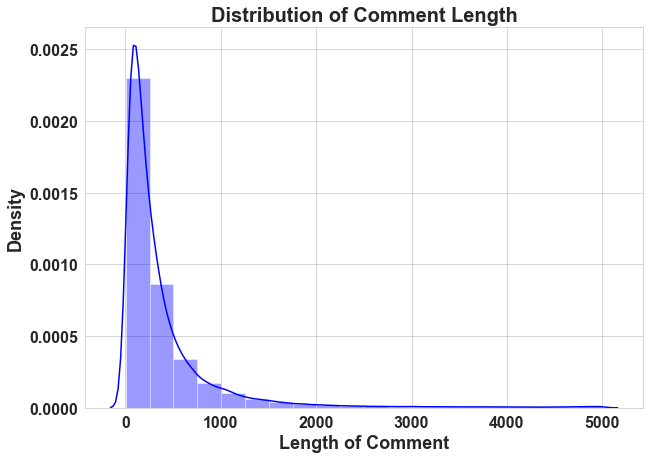

In [98]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

In [99]:
#Checking correlation of the dataset
corr=df.corr()  
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


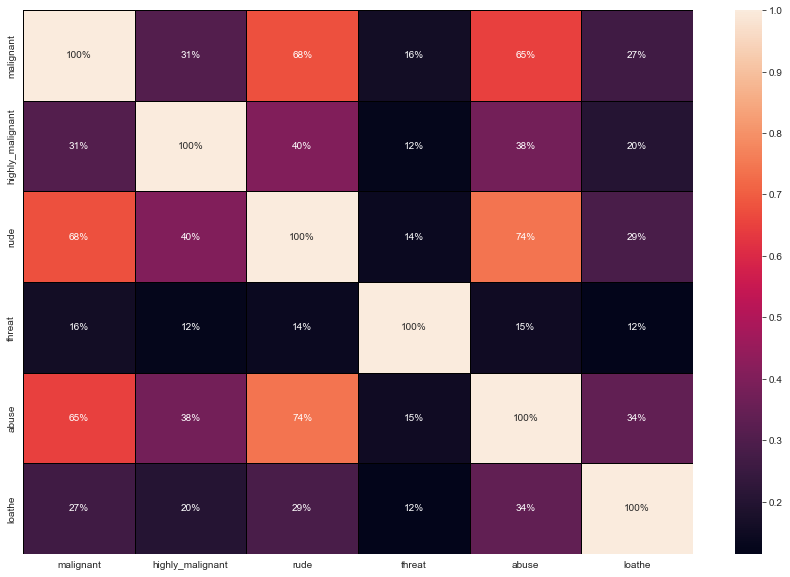

In [100]:
# Plotting heatmap for visualizing the correlation
plt.figure(figsize=(15, 10))
corr = df.corr() 
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', annot=True)
plt.show()

## checking skewness

In [101]:
df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

# Data pre-processing

In [102]:
# Creating a column 'length_before_cleaning' in training dataset
# It represents the length of the each comment respectively in a column 'comment_text' 
df['length_before_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [103]:
# Creating a column 'length_before_cleaning' in test dataset
# It represents the length of the each comment respectively in a column 'comment_text' 
dft['length_before_cleaning'] = dft['comment_text'].map(lambda comment_text: len(comment_text))
dft.head(5)

,comment_text,length_before_cleaning
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41


# NLP
    Operation perform are as followed:

1. Removing Punctuations and other special characters
2. Word Tokenzation
3. Removing Stop Words
4. Stemming and Lemmatising
5. Applying Count Vectoriser

In [104]:
# Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [106]:
#Replacing '\n' in comment_text
df['comment_text'] = df['comment_text'].replace('\n',' ')

In [107]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [108]:
# Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df['comment_text'] = df['comment_text'].apply(clean_comments)
df['comment_text'].head()

0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: comment_text, dtype: object

In [109]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df['length_after_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_before_cleaning,length_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,67,29


In [110]:
# Checking Total length removal in train dataset
print("Original Length:", df.length_before_cleaning.sum())
print("Cleaned Length:", df.length_after_cleaning.sum())
print("Total Words Removed:", (df.length_before_cleaning.sum()) - (df.length_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 38474840
Total Words Removed: 24418290


In [111]:
# Calling the above function for the column comment_text in test dataset so that we can replace original with cleaned text
dft['comment_text'] = dft['comment_text'].apply(clean_comments)
dft['comment_text'].head()

0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                           source zawe ashton lapland
3    look back source information updated correct f...
4                             anonymously edit article
Name: comment_text, dtype: object

In [112]:
#Creating a column 'len_after_cleaning'
#It represents the length of the each comment respectively in a column 'comment_text' after cleaning the text
dft['length_after_cleaning'] = dft['comment_text'].map(lambda comment_text: len(comment_text))
dft.head()


,comment_text,length_before_cleaning,length_after_cleaning
0,yo bitch ja rule succesful ever whats hating s...,367,235
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


In [113]:
# Total length removal in test dataset
print('Original Length:',dft.length_before_cleaning.sum())
print('Clean Length:',dft.length_after_cleaning.sum())
print("Total Words Removed:", (dft.length_before_cleaning.sum()) - (dft.length_after_cleaning.sum()))

Original Length: 55885733
Clean Length: 34282033
Total Words Removed: 21603700


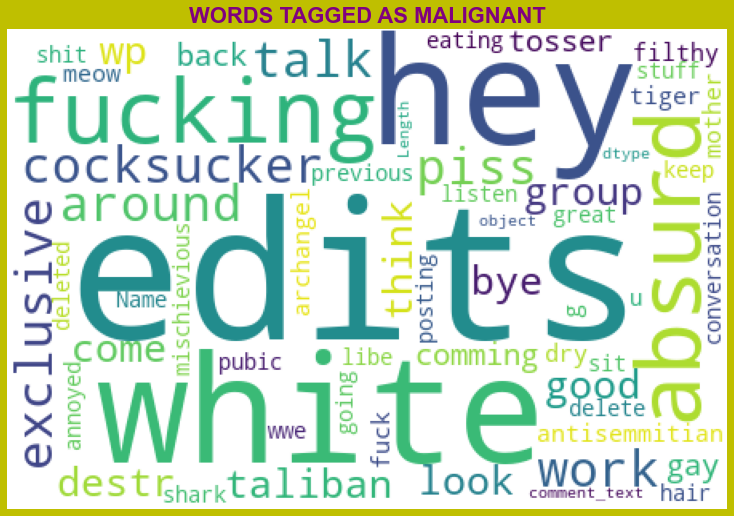

In [114]:
# Plotting for malignant
df_malignant=df[(df['malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

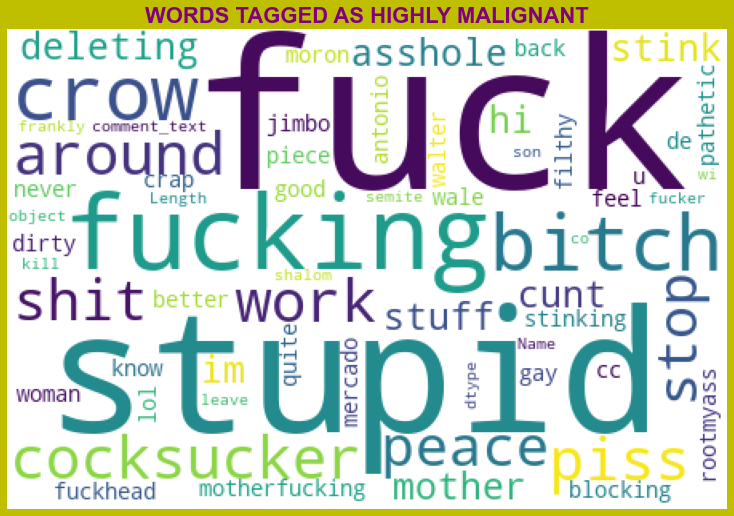

In [115]:
# Plotting for highly_malignant
df_highlymalignant=df[(df['highly_malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

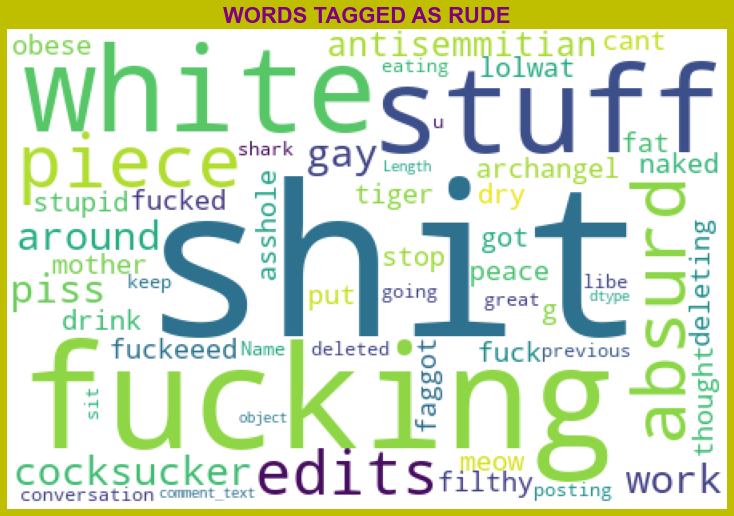

In [116]:
# Plotting for rude
df_rude=df[(df['rude']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()


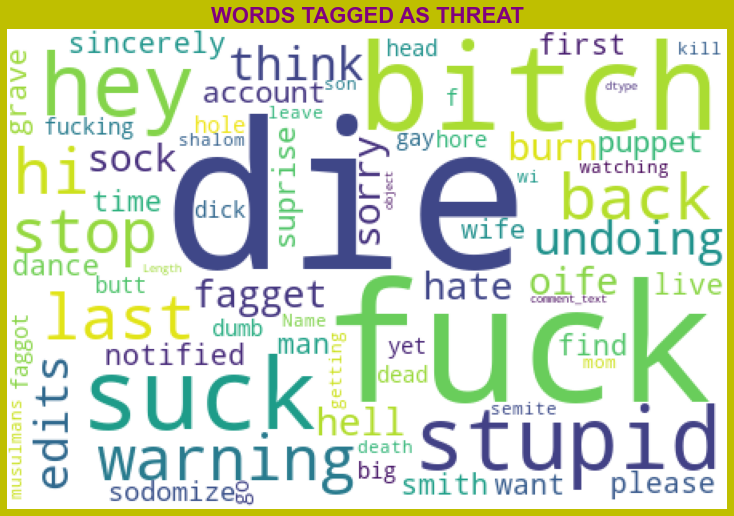

In [117]:
# Plotting for threat
df_threat=df[(df['threat']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

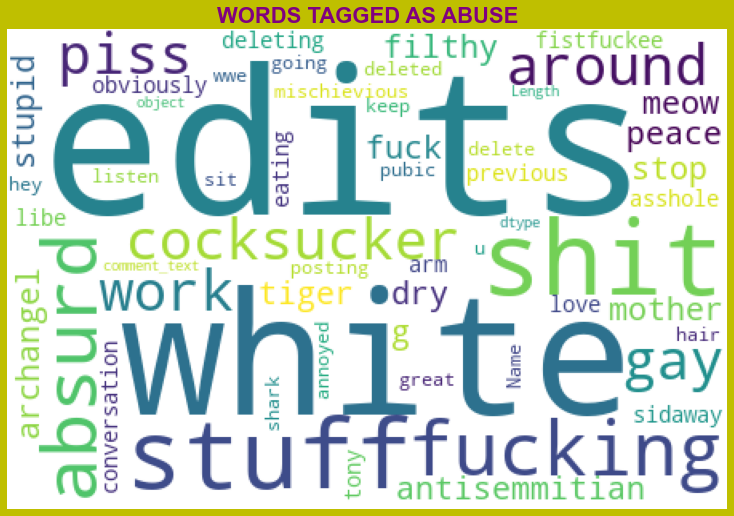

In [118]:
# Plotting for abuse
df_abuse=df[(df['abuse']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

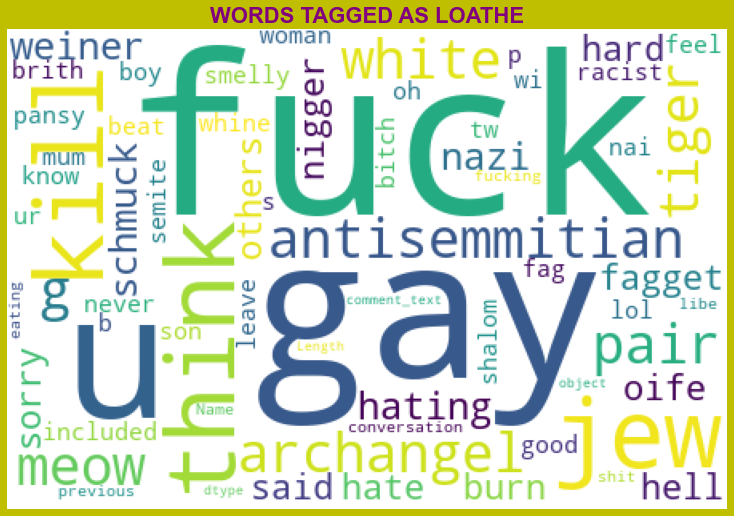

In [119]:
# Plotting for loathe
df_loathe=df[(df['loathe']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()


In [122]:
# making one target column 
df["label"]= df["malignant"] | df["highly_malignant"] | df["rude"] | df["threat"] | df["abuse"] | df["loathe"]


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
#Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])
x = features
y=df['label']


In [125]:
df.shape

(159571, 10)

In [126]:
dft.shape

(153164, 3)

# Creating Model

In [127]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss
from sklearn.model_selection import RepeatedStratifiedKFold

In [128]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=70)

In [129]:
x.shape, y.shape

((159571, 10000), (159571,))

In [130]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((111699, 10000), (111699,), (47872, 10000), (47872,))

# 1. Logistic Regression

In [131]:

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))


   

accuracy_score:  0.956759692513369
confusion_matrix: 
 [[42778   249]
 [ 1821  3024]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43027
           1       0.92      0.62      0.75      4845

    accuracy                           0.96     47872
   macro avg       0.94      0.81      0.86     47872
weighted avg       0.96      0.96      0.95     47872



## Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

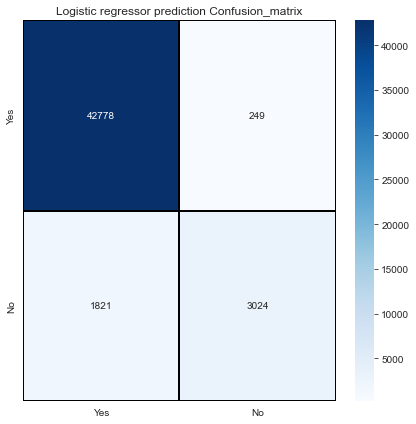

In [132]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Logistic regressor prediction Confusion_matrix")


## Cross Validation Score for Logistic Regression

In [146]:
#CV Score for Logistic Regression
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.9562890458849187


# 2. AdaBoost Classifier

In [133]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc = abc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_abc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_abc))
print("classification_report: \n",classification_report(y_test,pred_abc))

accuracy_score:  0.9458765040106952
confusion_matrix: 
 [[42633   394]
 [ 2197  2648]]
classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     43027
           1       0.87      0.55      0.67      4845

    accuracy                           0.95     47872
   macro avg       0.91      0.77      0.82     47872
weighted avg       0.94      0.95      0.94     47872



## Confusion Matrix for AdaBoost Classifier

Text(0.5, 1.0, 'AdaBoost Classifier prediction Confusion_matrix')

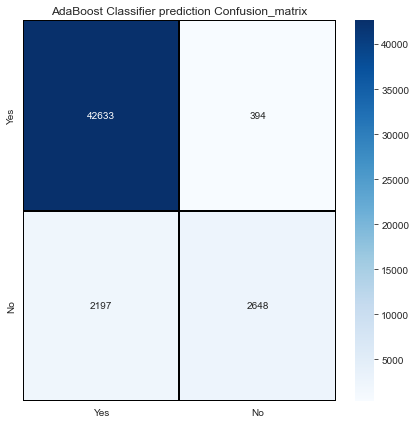

In [134]:
cm = confusion_matrix(y_test,pred_abc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("AdaBoost Classifier prediction Confusion_matrix")

## Cross Validation Score for AdaBoost Classifier

In [148]:
print('CV score for AdaBoost Classifier: ',cross_val_score(abc,x,y,cv=5).mean())

CV score for AdaBoost Classifier:  0.9458924205583014


# 3. Decision Tree Classifier

In [135]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.9399440173796791
confusion_matrix: 
 [[41610  1417]
 [ 1458  3387]]
classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     43027
           1       0.71      0.70      0.70      4845

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



## Confusion Matrix for Decision Tree Classifier

Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

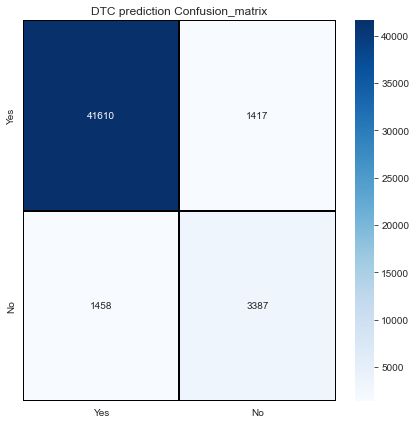

In [136]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("DTC prediction Confusion_matrix")

## Cross Validation Score for Decision Tree Classifier

In [149]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.9408037798905567


# 4. KNN Classifier

In [137]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))


accuracy_score:  0.9165900735294118
confusion_matrix: 
 [[42542   485]
 [ 3508  1337]]
classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     43027
           1       0.73      0.28      0.40      4845

    accuracy                           0.92     47872
   macro avg       0.83      0.63      0.68     47872
weighted avg       0.90      0.92      0.90     47872



## Confusion Matrix for KNN

Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

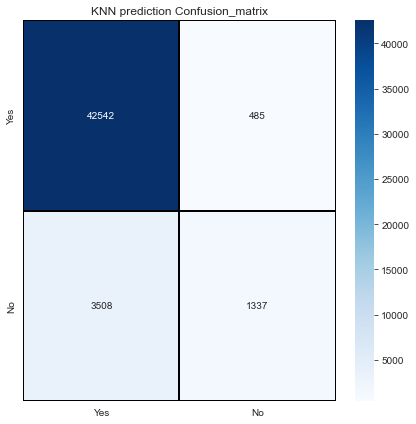

In [138]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("KNN prediction Confusion_matrix")


## Cross Validation Score for KNN Classifier

In [150]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.918876233559345


# 5. Gradient Boosting Classifier

In [139]:
gb = GradientBoostingClassifier(n_estimators =100,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))

accuracy_score:  0.9439756016042781
confusion_matrix: 
 [[42863   164]
 [ 2518  2327]]
classification_report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     43027
           1       0.93      0.48      0.63      4845

    accuracy                           0.94     47872
   macro avg       0.94      0.74      0.80     47872
weighted avg       0.94      0.94      0.94     47872



## Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

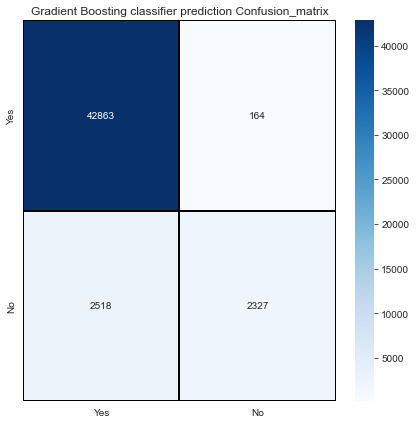

In [140]:
cm = confusion_matrix(y_test,pred_gb)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Gradient Boosting classifier prediction Confusion_matrix")


## Cross Validation Score for Gradient Boosting Classifier

In [151]:
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

CV score for Gradient Boosting Classifier:  0.9436802409923324


# 6. XGB Classifier

In [141]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_XGBC))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_XGBC))
print("classification_report: \n",classification_report(y_test,pred_XGBC))

accuracy_score:  0.9538561163101604
confusion_matrix: 
 [[42737   290]
 [ 1919  2926]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     43027
           1       0.91      0.60      0.73      4845

    accuracy                           0.95     47872
   macro avg       0.93      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872



## Confusion Matrix for XGB Classifier

Text(0.5, 1.0, 'XGB Classifier prediction Confusion_matrix')

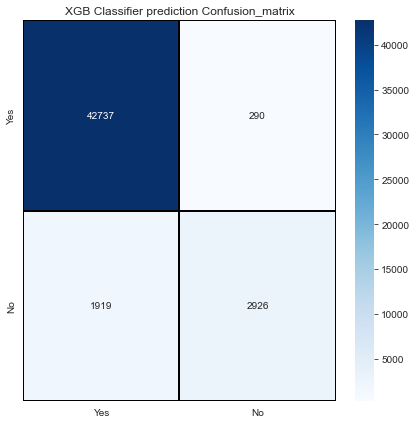

In [142]:
cm = confusion_matrix(y_test,pred_XGBC)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("XGB Classifier prediction Confusion_matrix")


## Cross Validation Score for XGB Classifier

In [152]:
print('CV score for XGB Classifier: ',cross_val_score(XGBC,x,y,cv=5).mean())

CV score for XGB Classifier:  0.9537760580926742


# 7. MultinomialNB

In [143]:
MNB= MultinomialNB()
MNB.fit(x_train,y_train)
pred_MNB = MNB.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_MNB))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_MNB))
print("classification_report: \n",classification_report(y_test,pred_MNB))


accuracy_score:  0.9484667446524064
confusion_matrix: 
 [[42842   185]
 [ 2282  2563]]
classification_report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     43027
           1       0.93      0.53      0.68      4845

    accuracy                           0.95     47872
   macro avg       0.94      0.76      0.82     47872
weighted avg       0.95      0.95      0.94     47872



## Confusion Matrix for MultinomialNB

Text(0.5, 1.0, 'MultinomialNB prediction Confusion_matrix')

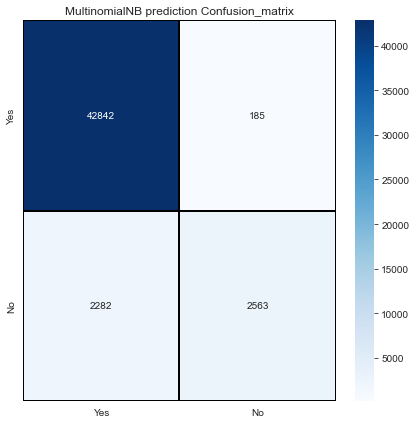

In [144]:
cm = confusion_matrix(y_test,pred_MNB)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("MultinomialNB prediction Confusion_matrix")

## Cross Validation Score for XGB Classifier

In [153]:
print('CV score for MultinomialNB: ',cross_val_score(MNB,x,y,cv=5).mean())

CV score for MultinomialNB:  0.947941672439417


# 8. Random Forest Classifier

In [145]:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC = RFC.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_RFC))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_RFC))
print("classification_report: \n",classification_report(y_test,pred_RFC))


accuracy_score:  0.9570521390374331
confusion_matrix: 
 [[42427   600]
 [ 1456  3389]]
classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     43027
           1       0.85      0.70      0.77      4845

    accuracy                           0.96     47872
   macro avg       0.91      0.84      0.87     47872
weighted avg       0.95      0.96      0.96     47872



## Confusion Matrix for Random Forest Classifier

Text(0.5, 1.0, ' Random Forest Classifier prediction Confusion_matrix')

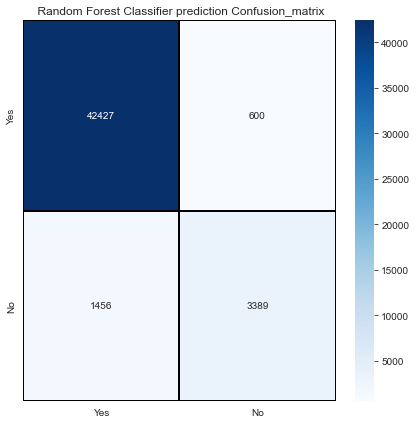

In [147]:
cm = confusion_matrix(y_test,pred_RFC)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title(" Random Forest Classifier prediction Confusion_matrix")

## Cross Validation Score for Random Forest Classifier

In [188]:
print('CV score for Random Forest Classifier: ',cross_val_score(RFC,x,y,cv=5).mean())

CV score for Random Forest Classifier:  0.9567903932559785


# ROC & AUC Curve for all model

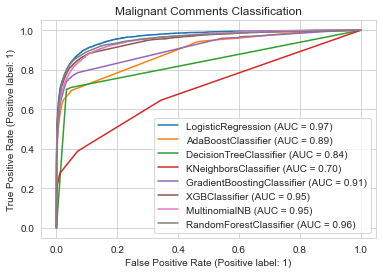

In [156]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score,classification_report, confusion_matrix, plot_roc_curve
disp = plot_roc_curve(lr, x_test, y_test)
plot_roc_curve(abc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(XGBC, x_test, y_test, ax = disp.ax_)
plot_roc_curve(MNB, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax = disp.ax_)
plt.title("Malignant Comments Classification")
plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()


### From the observation of accuracy and cross validation score and their difference we can predict that Logistic Regression is the best model.

# Hyper parameter tuning for best model

## The Logistic Regression with GridsearchCV

In [157]:
from sklearn.model_selection import  GridSearchCV

In [158]:
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']

In [159]:
param_grid = dict(solver = solver_options, 
                  multi_class = multi_class_options, 
                  class_weight = class_weight_options)


In [160]:
clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring = 'accuracy', )

In [161]:
clf.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': ['None', 'balanced'],
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='accuracy')

In [162]:
clf.best_estimator_

LogisticRegression(class_weight='None', multi_class='ovr')

In [163]:
print (f'Accuracy - : {clf.score(x,y)}')

Accuracy - : 0.9608074148811501


In [164]:
malignant= LogisticRegression(class_weight='None',multi_class='ovr')
malignant.fit(x_train,y_train)

LogisticRegression(class_weight='None', multi_class='ovr')

In [165]:
pred = malignant.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print("Cross_validation_Score :", cross_val_score(lr,x,y,cv=5).mean())
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))


accuracy score:  0.956759692513369
Cross_validation_Score : 0.9562890458849187
confusion_matrix: 
 [[42778   249]
 [ 1821  3024]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43027
           1       0.92      0.62      0.75      4845

    accuracy                           0.96     47872
   macro avg       0.94      0.81      0.86     47872
weighted avg       0.96      0.96      0.95     47872



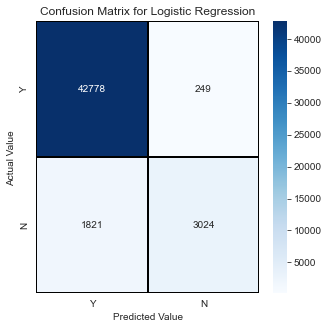

In [166]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value ")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [167]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

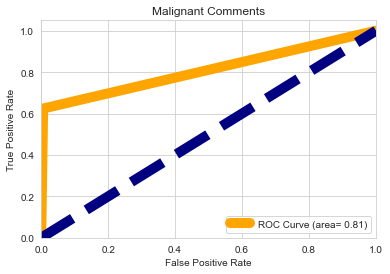

In [168]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Malignant Comments")
plt.legend(loc="lower right")
plt.show()

###  This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.81.

## The Logistic Regression with RandomizedSearchCV

In [169]:
from sklearn.model_selection import RandomizedSearchCV
param =      {'warm_start':[True,False],
            'dual':[True,False],
              'random_state':[50,70,100]}


In [170]:
rand_search = RandomizedSearchCV(lr,param_distributions=param,cv=2)


In [171]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=LogisticRegression(),
                   param_distributions={'dual': [True, False],
                                        'random_state': [50, 70, 100],
                                        'warm_start': [True, False]})

In [172]:
rand_search.best_params_

{'warm_start': False, 'random_state': 100, 'dual': False}

In [173]:
lr= LogisticRegression(warm_start=False,random_state=100,dual=False)
lr.fit(x_train,y_train)

y_pred1= lr.predict(x_test)


In [174]:
print(" Accuracy score :",accuracy_score(y_test,y_pred1),
      "\n","="*80,
      "\n Cross_validation_Score :", cross_val_score(lr,x,y,cv=5).mean(),
      "\n","="*80,
      "\n Classification report :\n",classification_report(y_test,y_pred1),
     "="*80,
      "\n Confusion matrix :\n",confusion_matrix(y_test,y_pred1))


 Accuracy score : 0.956759692513369 
 Cross_validation_Score : 0.9562890458849187 
 Classification report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43027
           1       0.92      0.62      0.75      4845

    accuracy                           0.96     47872
   macro avg       0.94      0.81      0.86     47872
weighted avg       0.96      0.96      0.95     47872
 Confusion matrix :
 [[42778   249]
 [ 1821  3024]]


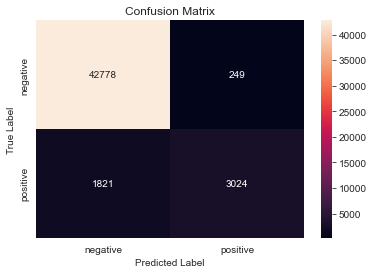

In [175]:
conf_mat = confusion_matrix(y_test, y_pred1)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Here the final model gives 95% accuracy after tuning.


## ROC-AUC Curve


In [176]:
fpr, tpr, threshold = roc_curve(y_test,y_pred1)
auc = roc_auc_score(y_test,y_pred1)

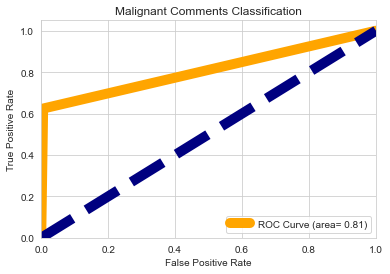

In [177]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Malignant Comments Classification")
plt.legend(loc="lower right")
plt.show()



#### This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.81.

### We can see both method of hypertunning is giving same result. So, we can proceed with any one and here proceeding with The Logistic Regression with RandomizedSearchCV.


## Saving the Model

In [179]:
import pickle

In [180]:
filename='Malignant_Comments_Classification.pickle'
pickle.dump(lr,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

## Checking predicted and original values

In [181]:
a =np.array(y_test)
predicted=np.array(loaded_model.predict(x_test))
Malignant_Comments_Classification=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Malignant_Comments_Classification


,Orginal,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
47867,0,0
47868,0,0
47869,0,0
47870,0,0


### Verifying Model on Testing Data

In [183]:
#test data (comments) converted to vectors
testing_data = tf_vec.fit_transform(dft["comment_text"])


In [184]:
prediction=lr.predict(testing_data)
prediction


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
dft['label'] = prediction
dft.head()


,comment_text,length_before_cleaning,length_after_cleaning,label
0,yo bitch ja rule succesful ever whats hating s...,367,235,0
1,rfc title fine imo,50,18,0
2,source zawe ashton lapland,54,26,0
3,look back source information updated correct f...,205,109,0
4,anonymously edit article,41,24,0


## Saving Testing Data


In [187]:
dft.to_csv('Malignant_Test.csv',index=False)